In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv(r"C:\Users\saura\Downloads\3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv")
print(df.head())
print(type(df))

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-07-2025 11:00:00,17.720000,83.300000,NO2,51.0,128.0,81.0
1,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-07-2025 11:00:00,17.720000,83.300000,CO,8.0,111.0,17.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",04-07-2025 11:00:00,27.103358,93.679645,PM10,NaN,NaN,NaN
3,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",04-07-2025 11:00:00,26.071318,91.874880,NO2,2.0,14.0,7.0
4,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",04-07-2025 11:00:00,26.071318,91.874880,SO2,4.0,11.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
3139,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",04-07-2025 11:00:00,22.499290,88.369170,SO2,2.0,4.0,3.0
3140,India,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",04-07-2025 11:00:00,22.499290,88.369170,OZONE,15.0,23.0,17.0
3141,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",04-07-2025 11:00:00,22.511060,88.351420,PM10,21.0,46.0,34.0
3142,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",04-07-2025 11:00:00,22.544808,88.340369,PM2.5,26.0,55.0,39.0


In [ ]:

df['last_update'] = pd.to_datetime(df['last_update'])


df = df.dropna(subset=['pollutant_avg'])


print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2955 entries, 0 to 3143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        2955 non-null   object        
 1   state          2955 non-null   object        
 2   city           2955 non-null   object        
 3   station        2955 non-null   object        
 4   last_update    2955 non-null   datetime64[ns]
 5   latitude       2955 non-null   float64       
 6   longitude      2955 non-null   float64       
 7   pollutant_id   2955 non-null   object        
 8   pollutant_min  2955 non-null   float64       
 9   pollutant_max  2955 non-null   float64       
 10  pollutant_avg  2955 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 277.0+ KB
None


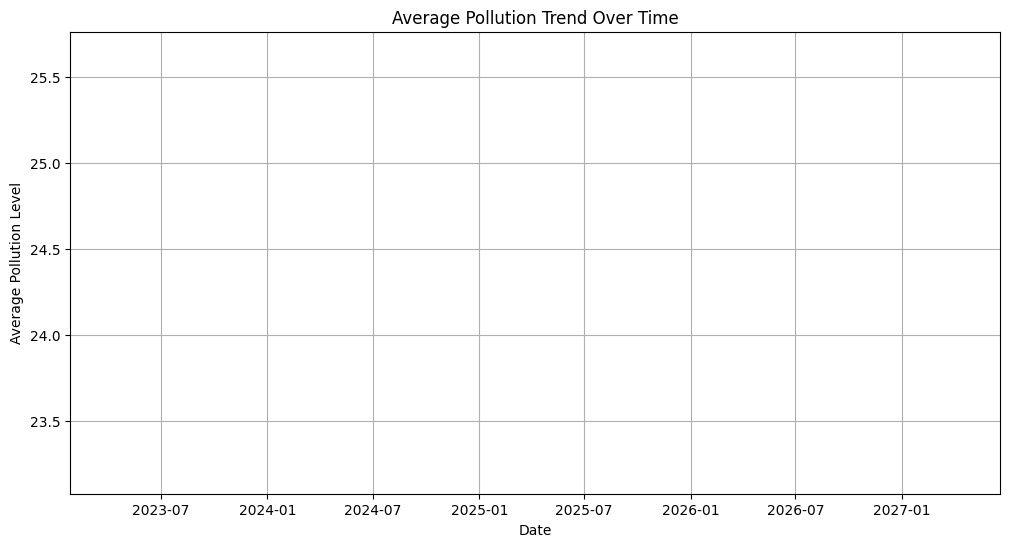

In [19]:
# Group by date
df_daily = df.groupby(df['last_update'].dt.date)['pollutant_avg'].mean()

plt.figure(figsize=(12,6))
df_daily.plot()
plt.title("Average Pollution Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Pollution Level")
plt.grid(True)
plt.show()


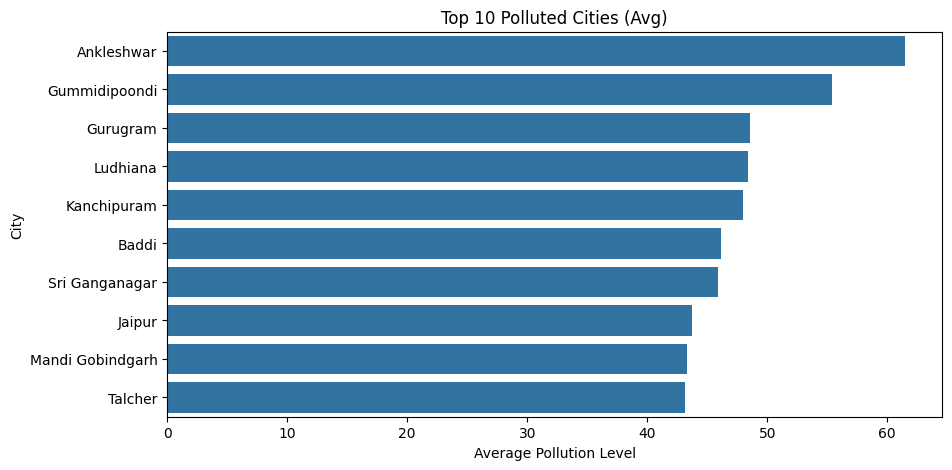

In [20]:
top_cities = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Polluted Cities (Avg)")
plt.xlabel("Average Pollution Level")
plt.ylabel("City")
plt.show()


C:\Users\saura\AppData\Local\Temp\ipykernel_21292\1922133129.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_pollution.values, y=city_pollution.index, palette='Reds_r')


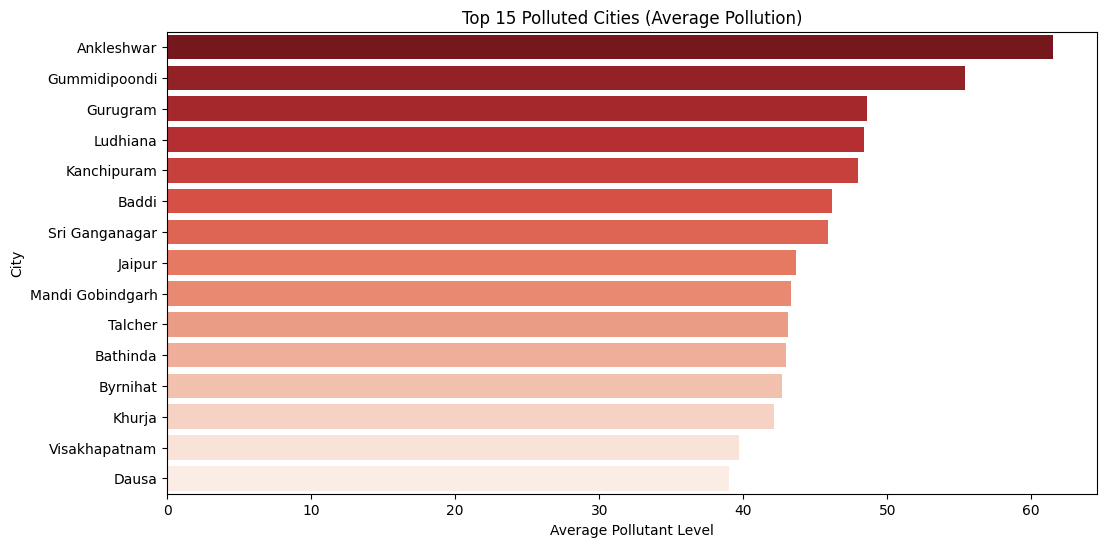

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and calculate average pollution
city_pollution = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=city_pollution.values, y=city_pollution.index, palette='Reds_r')
plt.title("Top 15 Polluted Cities (Average Pollution)")
plt.xlabel("Average Pollutant Level")
plt.ylabel("City")
plt.show()


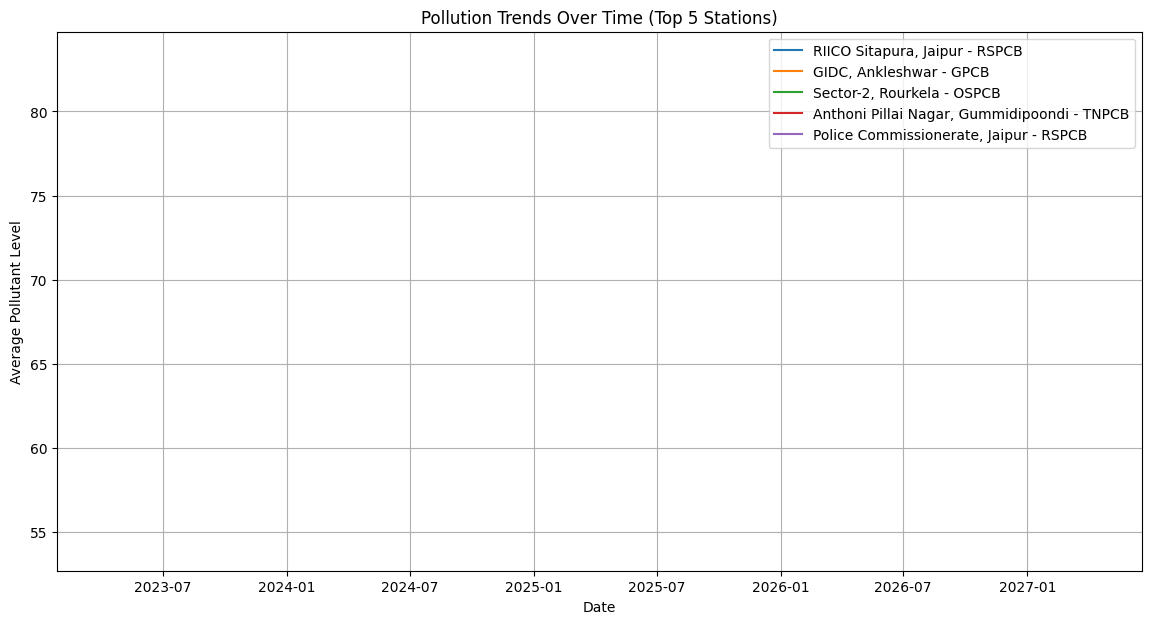

In [25]:
# Choose a few sample stations (most polluted or popular ones)
top_stations = df.groupby('station')['pollutant_avg'].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(14,7))

for station in top_stations:
    station_data = df[df['station'] == station]
    station_data = station_data.groupby('last_update')['pollutant_avg'].mean()
    plt.plot(station_data.index, station_data.values, label=station)

plt.title("Pollution Trends Over Time (Top 5 Stations)")
plt.xlabel("Date")
plt.ylabel("Average Pollutant Level")
plt.legend()
plt.grid(True)
plt.show()


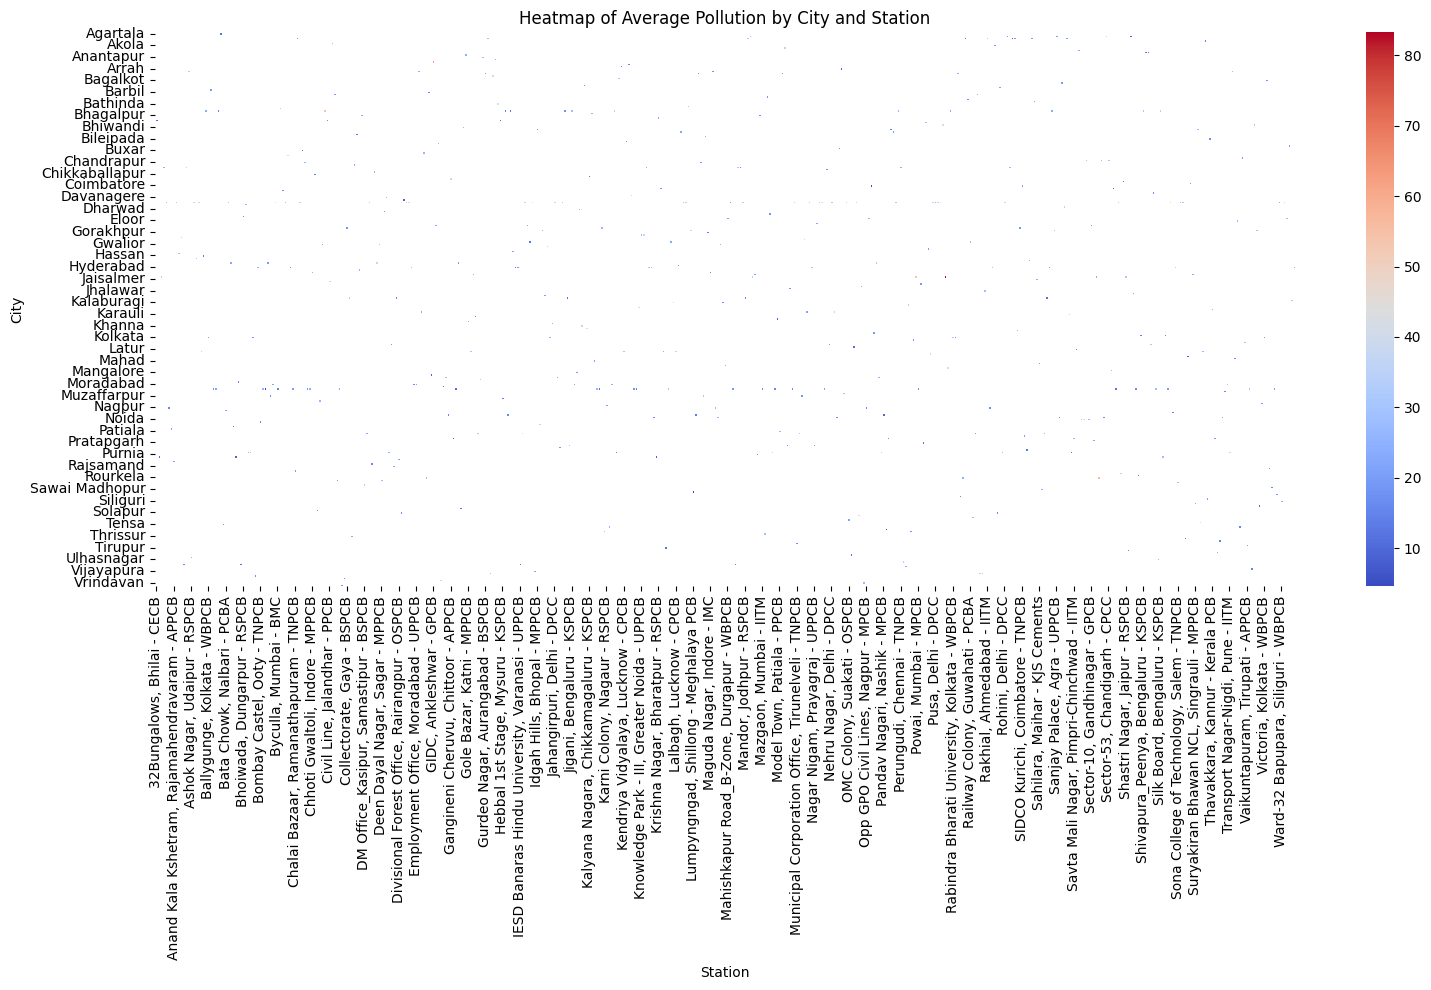

In [26]:
# Create pivot table (Cities × Stations)
pivot = df.pivot_table(values='pollutant_avg', index='city', columns='station', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Average Pollution by City and Station")
plt.xlabel("Station")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [21]:
# Extract time features
df['year'] = df['last_update'].dt.year
df['month'] = df['last_update'].dt.month
df['day'] = df['last_update'].dt.day

# Encode categorical variables
df_encoded = pd.get_dummies(df[['state', 'city', 'pollutant_id']], drop_first=True)

# Combine features
X = pd.concat([df[['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'year', 'month']], df_encoded], axis=1)
y = df['pollutant_avg']


C:\Users\saura\AppData\Local\Temp\ipykernel_21292\3890756689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['last_update'].dt.year
C:\Users\saura\AppData\Local\Temp\ipykernel_21292\3890756689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['last_update'].dt.month
C:\Users\saura\AppData\Local\Temp\ipykernel_21292\3890756689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.8577972817814971
RMSE: 8.09506448153647
